#### importing libraries

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.path as mpath
import matplotlib.cm as cm
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import colors as mcolors
from matplotlib.colors import ListedColormap
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
import cartopy.mpl.gridliner as gridliner
import matplotlib.ticker as mticker
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore", message="All-NaN slice encountered")

#### opening obs data

In [18]:
start_time=time.time()
path='/storage2/tkyeimiah/Obs/CIS/CIS_raw/'
#path1='/storage2/tkyeimiah/Obs/CIS/CIS_1982_1990/'
obs=xr.open_dataset(path+'CIS_10km_1990.nc')
end_time=time.time()
elapsed_time = end_time - start_time
# Convert seconds to hours, minutes, seconds
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

Execution time:  0.0 hours, 0.0 minutes, 0.06606769561767578 seconds


In [20]:
obs.CT

<xarray.DataArray 'CT' (time: 52, rlat: 498, rlon: 562)>
[14553552 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1990-01-01 1990-01-08 ... 1990-12-25
    lon      (rlat, rlon) float64 ...
    lat      (rlat, rlon) float64 ...
  * rlon     (rlon) float64 -28.05 -27.95 -27.85 -27.75 ... 27.85 27.95 28.05
  * rlat     (rlat) float64 -24.85 -24.75 -24.65 -24.55 ... 24.65 24.75 24.85
Attributes:
    standard_name:  Total Ice Concentration Code
    long_name:      Concentration Code
    units:          Code Figure
    grid_mapping:   rotated_pole
    level_desc:     Arbitrary Levels
    time_desc:      19900101000000
    grid_desc:      rotated_pole
    cell_methods:   time: point

#### selecting domain from obs data

Execution time:  0.0 hours, 0.0 minutes, 1.0143671035766602 seconds


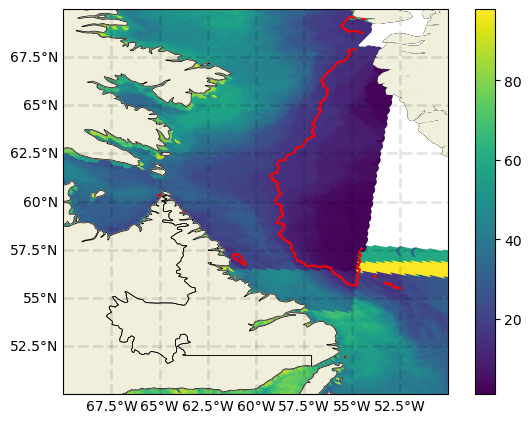

In [21]:
start_time=time.time()
fig,ax=plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(7,5))
cb=ax.scatter( obs.CT.lon,  obs.CT.lat, c= obs.CT.mean('time'),transform=ccrs.PlateCarree())
ax.contour( obs.CT.lon,  obs.CT.lat, obs.CT.mean('time'), levels=[15], colors='red', transform=ccrs.PlateCarree())
ax.coastlines()
ax.coastlines(zorder=2)
ax.add_feature(cfeature.LAND, zorder=2)
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5,  zorder=2)
ax.set_extent([-50,-70,50,70],crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, linewidth=2, color='black', alpha=0.1, linestyle='--',transform=ccrs.PlateCarree())
gl.xlabels_bottom, gl.ylabels_left = True, True
gl.xlabels_top, gl.ylabels_right = False, False
#ax.add_patch(mpatches.Rectangle(xy=[-58, 54], width=25, height=15, linewidth=4, facecolor='none',
                                 #edgecolor='red',alpha=0.8,zorder=10, transform=ccrs.PlateCarree()))
plt.colorbar(cb)
end_time=time.time()
elapsed_time = end_time - start_time
# Convert seconds to hours, minutes, seconds
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

In [ ]:
'''
start_time=time.time()
fig,ax=plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(10,25))
cb=ax.scatter(model.aice.TLON, model.aice.TLAT, c=model.aice.fillna(0).mean('time'),transform=ccrs.PlateCarree())
ax.coastlines()
ax.coastlines(zorder=2)
ax.add_feature(cfeature.LAND, zorder=2)
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5,  zorder=2)
ax.set_extent([-20,-145,30,85],crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, linewidth=2, color='black', alpha=0.1, linestyle='--',transform=ccrs.PlateCarree())
gl.xlabels_bottom, gl.ylabels_left = True, True
gl.xlabels_top, gl.ylabels_right = False, False
#ax.add_patch(mpatches.Rectangle(xy=[-58, 54], width=25, height=15, linewidth=4, facecolor='none',
                                 #edgecolor='red',alpha=0.8,zorder=10, transform=ccrs.PlateCarree()))
end_time=time.time()
elapsed_time = end_time - start_time
# Convert seconds to hours, minutes, seconds
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")
'''

In [5]:
# Define the Labrador coast boundaries - obs
#lat_min, lat_max = 50, 61
#lon_min, lon_max =-65, -55  #65W & 55W
#lat_min, lat_max = 51, 69 #67
#lon_min, lon_max =-68, -45 #68W & 45W
lat_min, lat_max = 51, 69
lon_min, lon_max =-73, -45 
# Create a mask for Labrador coast 
mask = ((obs.lat>= lat_min) & (obs.lat <= lat_max) & (obs.lon >= lon_min) & (obs.lon<= lon_max))
obs_region =obs.where(mask, drop=True)

In [7]:
obs_region.CT

<xarray.DataArray 'CT' (time: 1612, rlat: 206, rlon: 181)>
dask.array<where, shape=(1612, 206, 181), dtype=float32, chunksize=(52, 206, 181), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1990-01-01 1990-01-08 ... 2020-12-25
    lon      (rlat, rlon) float64 dask.array<chunksize=(206, 181), meta=np.ndarray>
    lat      (rlat, rlon) float64 dask.array<chunksize=(206, 181), meta=np.ndarray>
  * rlon     (rlon) float64 4.15 4.25 4.35 4.45 4.55 ... 21.85 21.95 22.05 22.15
  * rlat     (rlat) float64 -12.95 -12.85 -12.75 -12.65 ... 7.25 7.35 7.45 7.55
Attributes:
    standard_name:  Total Ice Concentration Code
    long_name:      Concentration Code
    units:          Code Figure
    grid_mapping:   rotated_pole
    level_desc:     Arbitrary Levels
    time_desc:      19900101000000
    grid_desc:      rotated_pole
    cell_methods:   time: point

#### opening model data 

In [6]:
path1='/Users/thomas/Downloads/Research/Data Analysis/esemble 1001-001'
model=xr.open_mfdataset(path1+'/*.nc')

In [7]:
model

<xarray.Dataset>
Dimensions:      (nj: 384, ni: 320, time: 3012, nc: 5, nkice: 8, nksnow: 3, nkbio: 5, nvertices: 4, d2: 2)
Coordinates:
    TLON         (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT         (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULON         (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT         (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time         (time) object 1850-02-01 00:00:00 ... 2101-01-01 00:00:00
Dimensions without coordinates: nj, ni, nc, nkice, nksnow, nkbio, nvertices, d2
Data variables: (12/21)
    NCAT         (time, nc) float32 dask.array<chunksize=(120, 5), meta=np.ndarray>
    VGRDi        (time, nkice) float32 dask.array<chunksize=(120, 8), meta=np.ndarray>
    VGRDs        (time, nksnow) float32 dask.array<chunksize=(120, 3), meta=np.ndarray>
    VGRDb        (time, nkbio) float32 dask.array<chunksize=(120, 5), meta=np.ndarray>
    tmask        (time, nj, ni) float32 dask.array<chunksize=(120, 384, 320), meta=np.ndarray>
    tarea        (time, nj, ni) float32 dask.array<chunksize=(120, 384, 320), meta=np.ndarray>
    ...           ...
    lont_bounds  (time, nj, ni, nvertices) float32 dask.array<chunksize=(120, 384, 320, 4), meta=np.ndarray>
    latt_bounds  (time, nj, ni, nvertices) float32 dask.array<chunksize=(120, 384, 320, 4), meta=np.ndarray>
    lonu_bounds  (time, nj, ni, nvertices) float32 dask.array<chunksize=(120, 384, 320, 4), meta=np.ndarray>
    latu_bounds  (time, nj, ni, nvertices) float32 dask.array<chunksize=(120, 384, 320, 4), meta=np.ndarray>
    time_bounds  (time, d2) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    aice         (time, nj, ni) float32 dask.array<chunksize=(120, 384, 320), meta=np.ndarray>
Attributes:
    title:             b.e21.BHISTcmip6.f09_g17.LE2-1001.001
    contents:          Diagnostic and Prognostic Variables
    source:            Los Alamos Sea Ice Model (CICE) Version 5
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    comment:           All years have exactly 365 days
    comment2:          File written on model date 18500201
    comment3:          seconds elapsed into model date:      0
    conventions:       CF-1.0
    history:           This dataset was created on 2020-01-31 at 16:34
    io_flavor:         io_pio

#### selecting the domain from model data

In [8]:
# Define the Labrador coast boundaries - model
#lat_min, lat_max = 50, 61
#lonmin, lonmax =295, 305 #65W & 55W
#lonmin, lonmax =292, 315 #68W & 45W
#lat_min, lat_max =51,67
lonmin, lonmax =287, 315 #68W & 45W
lat_min, lat_max =51,69

# Create a mask for Labrador coast 
mask2 = ((model.TLAT >= lat_min) & (model.TLAT <= lat_max) & (model.TLON >= lonmin) & (model.TLON <= lonmax))
model_region =model.where(mask2, drop=True)

#### selecting the SIC and area for both data

In [9]:
#obs
obs_CT=obs_region.CT
obs_area=obs_region.area

#model
model_CT=model_region.aice
model_area=model_region.tarea

#### converting obs code figure to actual values

In [11]:
new_array=[]
start_time=time.time()
for i in obs_CT.values.flatten():
    #if np.isnan(i):
        #pass
    if i < 100:
        new_array.append(i)
end_time=time.time()
elapsed_time = end_time - start_time

# Convert seconds to hours, minutes, seconds
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")
print(sorted (set(new_array)))

Execution time:  0.0 hours, 1.0 minutes, 58.05195593833923 seconds
[0.0, 0.05, 0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0]


In [10]:
#converting code figure to actual values
listnum = [-9.0, 1.0, 2.0, 10.0, 20.0, 30.0, 40.0, 50.0, 55.0, 60.0, 70.0, 80.0, 90.0, 91.0, 92.0, 98.0]
replace = [np.nan, 0.05, 0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9, 0.95, 1, 0]

for i in range(16):
    obs_CT=obs_CT.where(obs_CT != listnum[i], replace[i])

#### calculating the total sea ice extent

In [ ]:
#finding the actual concentration of each grid
#obs_total=(((obs_CT.where(obs_CT >= 0.15))*obs_area).sum(['rlat','rlon']))/1e6
#model_total=(((model_CT.where(model_CT >= 0.15))*model_area).sum(['nj','ni']))/1e12

In [12]:
#finding the actual concentration of each grid
obs_greater_15 = xr.where(obs_CT >= 0.15, 1, 0)
obs_total=((obs_greater_15 * obs_area).sum(['rlat','rlon']))/1e6
model_greater_15 = xr.where(model_CT >= 0.15, 1, 0)
model_total=((model_greater_15 * model_area).sum(['nj','ni']))/1e12

In [ ]:
#obs_total=obs_total.where(obs_total>0,0)
#model_total=model_total.where(model_total>0,0)

#### Plots - yearly mean

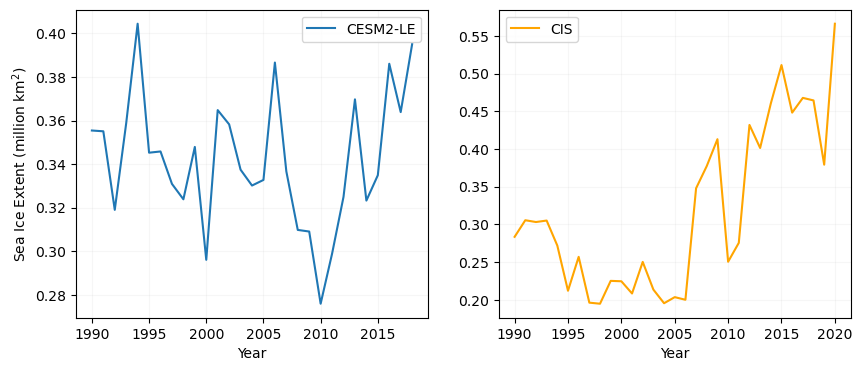

Execution time:  0.0 hours, 0.0 minutes, 7.192794322967529 seconds


In [13]:
#Plot of the obs and model from 1990 to 2018
start_time=time.time()

fig, ax=plt.subplots(1,2, figsize=(10,4))
model_yearly_mean = model_total.sel(time=slice('1990','2018')).groupby('time.year').mean('time')
obs_yearly_mean = obs_total.groupby('time.year').mean('time')

ax[0].plot(model_yearly_mean.year, model_yearly_mean, label='CESM2-LE')
ax[1].plot(obs_yearly_mean.year, obs_yearly_mean,  color='orange', label='CIS')
ax[0].set_xlabel('Year')
ax[1].set_xlabel('Year')
ax[0].set_ylabel('Sea Ice Extent (million km$^2$)')
#ax[1].set_ylabel('Total Sea Ice Extent (million km$^2$)')
ax[0].legend()
ax[1].legend()
ax[0].grid(alpha=0.1)
ax[1].grid(alpha=0.1)

plt.show()

end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

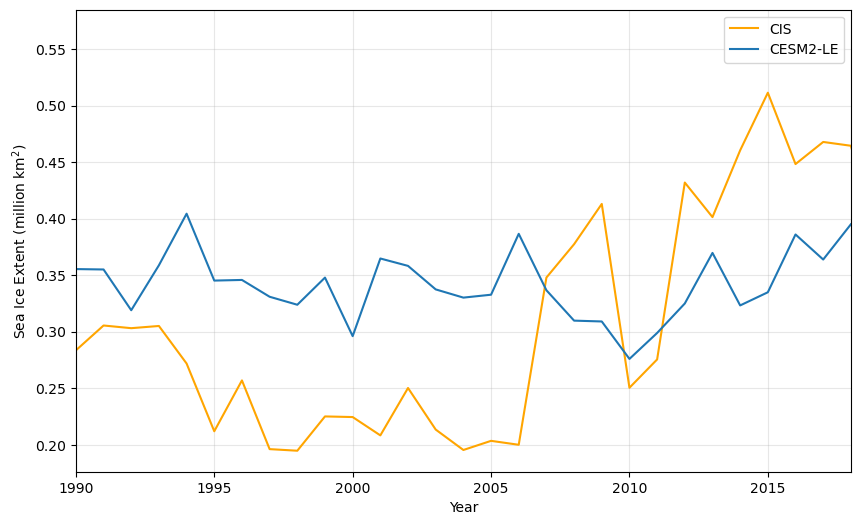

Execution time:  0.0 hours, 0.0 minutes, 5.655369997024536 seconds


In [14]:
#Plot of the obs and model from 1990 to 2018
fig, ax=plt.subplots(figsize=(10,6))
start_time=time.time()
model_yearly_mean = model_total.sel(time=slice('1990','2018')).groupby('time.year').mean('time')
obs_yearly_mean = obs_total.groupby('time.year').mean('time')


ax.plot(obs_yearly_mean.year, obs_yearly_mean,  color='orange', label='CIS')
ax.plot(model_yearly_mean.year, model_yearly_mean, label='CESM2-LE')
#ax.set_title('Yearly mean Sea Ice Extent')
ax.set_xlabel('Year')
ax.set_ylabel('Sea Ice Extent (million km$^2$)')
ax.legend()
ax.grid(alpha=0.3)
plt.xlim(1990,2018)
#plt.savefig(path+'/plots/'+'plot9.jpg',dpi=300, bbox_inches='tight') 
plt.show()


end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

#### Selecting september and march data from both obs and model

In [15]:
#slicing and resampling 
model_total_sel=model_total.sel(time=slice('1990','2019'))
obs_total_sel=obs_total.resample(time='1M').mean().sel(time=slice('1990','2019'))

model_total_september=model_total_sel[8::12]
obs_total_september=obs_total_sel[8::12]
model_total_march=model_total_sel[2::12]
obs_total_march=obs_total_sel[2::12]

#### September and march Plot 

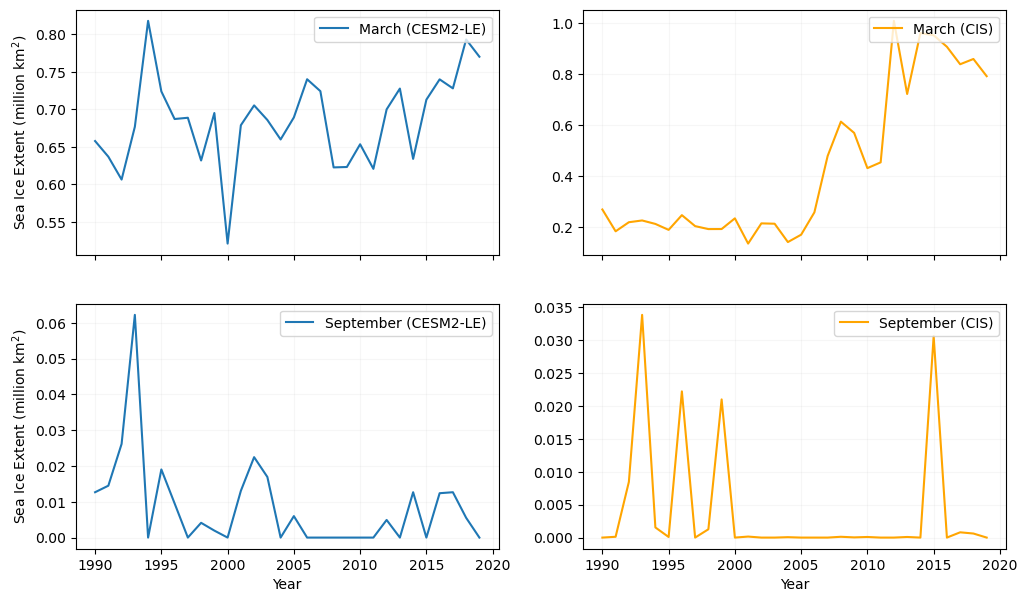

Execution time:  0.0 hours, 0.0 minutes, 10.484616994857788 seconds


In [16]:
#Plot of the obs and model from 1990 to 2018 for september and march
start_time=time.time()

fig, ax=plt.subplots(2,2, figsize=(12,7),sharex=True)
years=np.arange(1990,2020)
ax[0,0].plot(years, model_total_march, label='March (CESM2-LE)')
ax[0,1].plot(years, obs_total_march , color='orange',  label='March (CIS)')
ax[1,0].plot(years, model_total_september,  label='September (CESM2-LE)')
ax[1,1].plot(years, obs_total_september, color='orange', label='September (CIS)')

for i in range(2):
    for j in range(2):
        if (([i,j]==[1,0]) | ([i,j]==[1,1])):
            ax[i,j].set_xlabel('Year')
        if (([i,j]==[0,0]) | ([i,j]==[1,0])):
            ax[i,j].set_ylabel('Sea Ice Extent (million km$^2$)')
        ax[i,j].legend(loc='upper right')
        ax[i,j].grid(alpha=0.1)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.savefig('obs_model.jpg',dpi=300, bbox_inches='tight')       
plt.show()

end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

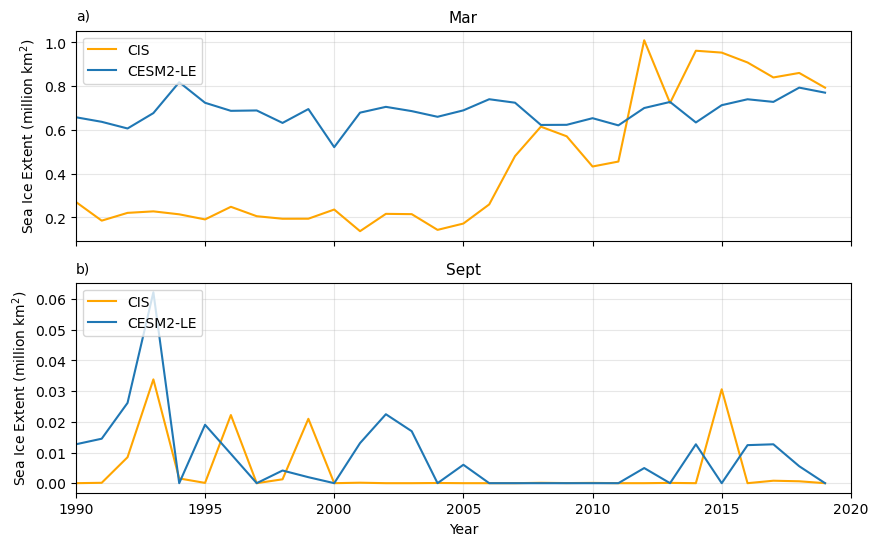

Execution time:  0.0 hours, 0.0 minutes, 9.171475172042847 seconds


In [17]:
start_time = time.time()

fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
years = np.arange(1990, 2020)

# First plot
ax[0].plot(years, obs_total_march, label='CIS', color='orange')
ax[0].plot(years, model_total_march, label='CESM2-LE')
ax[0].set_ylabel('Sea Ice Extent (million km$^2$)')
ax[0].legend(loc='upper left')
ax[0].grid(alpha=0.3)

# Second plot

ax[1].plot(years, obs_total_september, label='CIS', color='orange')
ax[1].plot(years, model_total_september, label='CESM2-LE')
ax[1].set_ylabel('Sea Ice Extent (million km$^2$)')
ax[1].legend(loc='upper left')
ax[1].grid(alpha=0.3)
ax[1].set_xlabel('Year')

ax[0].text(0, 1.05, 'a)',transform=ax[0].transAxes, fontsize=10)
ax[1].text(0, 1.05, 'b)',transform=ax[1].transAxes, fontsize=10)
ax[0].set_title('Mar', fontsize=11)
ax[1].set_title('Sept', fontsize=11)
plt.xlim(1990,2020)

plt.savefig(path+'/plots/'+'plot10.jpg', dpi=300, bbox_inches='tight')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")


#### April

In [18]:
#slicing and resampling 
model_total_april=model_total_sel[3::12]
obs_total_april=obs_total_sel[3::12]

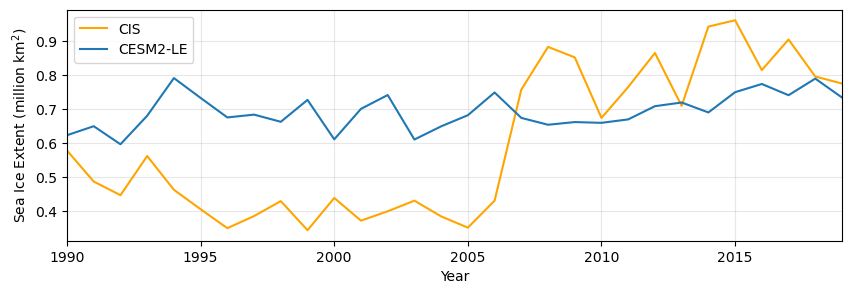

Execution time:  0.0 hours, 0.0 minutes, 4.920897006988525 seconds


In [30]:
#Plot of the obs and model from 1990 to 2018
fig, ax=plt.subplots(figsize=(10,3))
start_time=time.time()
model_yearly_mean1 = model_total_april.sel(time=slice('1990','2019')).groupby('time.year').mean('time')
obs_yearly_mean1 = obs_total_april.sel(time=slice('1990','2019')).groupby('time.year').mean('time')


ax.plot(obs_yearly_mean1.year, obs_yearly_mean1,  color='orange', label='CIS')
ax.plot(model_yearly_mean1.year, model_yearly_mean1, label='CESM2-LE')
#ax.set_title('Yearly mean Sea Ice Extent')
ax.set_xlabel('Year')
ax.set_ylabel('Sea Ice Extent (million km$^2$)')
ax.legend()
ax.grid(alpha=0.3)
plt.xlim(1990,2019)
plt.savefig('plot9.jpg',dpi=300, bbox_inches='tight') 
plt.show()


end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

In [19]:
model_total_april_2006=model_total_april.sel(time=slice('1990','2006'))
model_total_april_2019=model_total_april.sel(time=slice('2007','2019'))

obs_total_april_2006=obs_total_april.sel(time=slice('1990','2006'))
obs_total_april_2019=obs_total_april.sel(time=slice('2007','2019'))

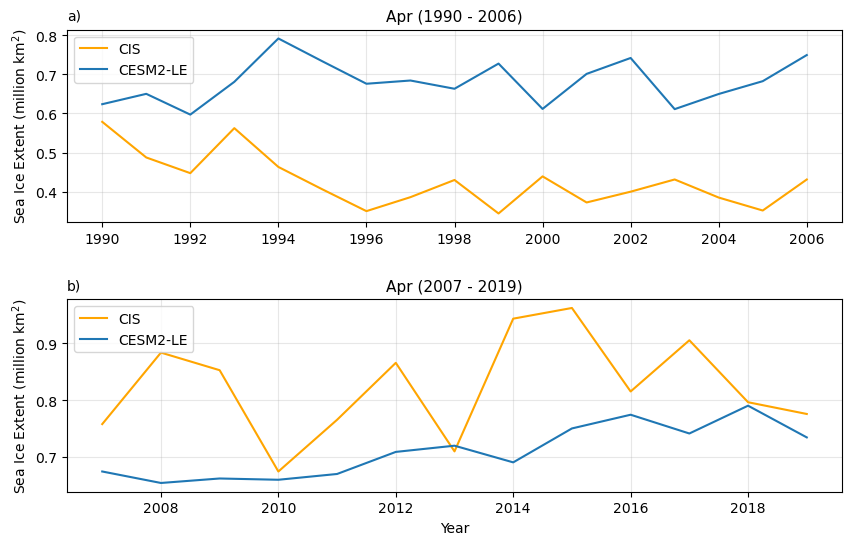

In [20]:
fig, ax=plt.subplots(2,1,figsize=(10,6))


years = np.arange(1990, 2007)
ax[0].plot(years,obs_total_april_2006,label='CIS', color='orange')
ax[0].plot(years,model_total_april_2006, label='CESM2-LE')
ax[0].legend(loc='upper left')
ax[0].grid(alpha=0.3)
ax[0].set_ylabel('Sea Ice Extent (million km$^2$)')

years = np.arange(2007, 2020)
ax[1].plot(years,obs_total_april_2019,label='CIS', color='orange')
ax[1].plot(years,model_total_april_2019, label='CESM2-LE')
ax[1].legend(loc='upper left')
ax[1].grid(alpha=0.3)
ax[1].set_ylabel('Sea Ice Extent (million km$^2$)')
ax[1].set_xlabel('Year')

ax[0].text(0, 1.05, 'a)',transform=ax[0].transAxes, fontsize=10)
ax[1].text(0, 1.05, 'b)',transform=ax[1].transAxes, fontsize=10)
ax[0].set_title('Apr (1990 - 2006)', fontsize=11)
ax[1].set_title('Apr (2007 - 2019)', fontsize=11)
plt.subplots_adjust(hspace=0.4)
#plt.savefig(path+'/plots/'+'obs_model_april.jpg',dpi=300, bbox_inches='tight')
#plt.subplots_adjust(hspace=0.7)
plt.show()

In [21]:
#slicing and resampling 
model_total_march=model_total_sel[2::12]
obs_total_march=obs_total_sel[2::12]

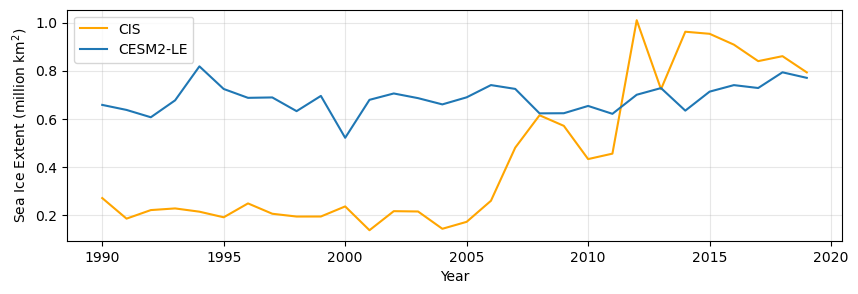

In [22]:
fig, ax=plt.subplots(figsize=(10,3))
years = np.arange(1990, 2020)
ax.plot(years,obs_total_march,label='CIS', color='orange')
ax.plot(years,model_total_march, label='CESM2-LE')
ax.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Sea Ice Extent (million km$^2$)')
plt.grid(alpha=0.3)
#plt.savefig(path+'/plots/'+'obs_model_march.jpg',dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
#obs_total_sel[10::12] *= 10**-40

#### Seasonally obs analysis

In [23]:
obs_1990_99 = obs_total_sel.sel(time=slice('1990', '1999'))
obs_2000_09 = obs_total_sel.sel(time=slice('2000', '2009'))
obs_2010_19 = obs_total_sel.sel(time=slice('2010', '2019'))

In [24]:
obs_1990_99_monthly = obs_1990_99.groupby('time.month').mean('time')
obs_2000_09_monthly = obs_2000_09.groupby('time.month').mean('time')
obs_2010_19_monthly = obs_2010_19.groupby('time.month').mean('time')

#### Seasonally model analysis

In [25]:
model_1850_59 = model_total.sel(time=slice('1850-01-01', '1859-12-31'))
model_1860_69 = model_total.sel(time=slice('1860-01-01', '1869-12-31'))
model_1870_79 = model_total.sel(time=slice('1870-01-01', '1879-12-31'))
model_1880_89 = model_total.sel(time=slice('1880-01-01', '1889-12-31'))
model_1890_99 = model_total.sel(time=slice('1890-01-01', '1899-12-31'))
model_1900_09 = model_total.sel(time=slice('1900-01-01', '1909-12-31'))
model_1910_19 = model_total.sel(time=slice('1910-01-01', '1919-12-31'))
model_1920_29 = model_total.sel(time=slice('1920-01-01', '1929-12-31'))
model_1930_39 = model_total.sel(time=slice('1930-01-01', '1939-12-31'))
model_1940_49 = model_total.sel(time=slice('1940-01-01', '1949-12-31'))
model_1950_59 = model_total.sel(time=slice('1950-01-01', '1959-12-31'))
model_1960_69 = model_total.sel(time=slice('1960-01-01', '1969-12-31'))
model_1970_79 = model_total.sel(time=slice('1970-01-01', '1979-12-31'))
model_1980_89 = model_total.sel(time=slice('1980-01-01', '1989-12-31'))
model_1990_99 = model_total.sel(time=slice('1990-01-01', '1999-12-31'))
model_2000_09 = model_total.sel(time=slice('2000-01-01', '2009-12-31'))
model_2010_19 = model_total.sel(time=slice('2010-01-01', '2019-12-31'))

model_2020_29 = model_total.sel(time=slice('2020-01-01', '2029-12-31'))
model_2030_39 = model_total.sel(time=slice('2030-01-01', '2039-12-31'))
model_2040_49 = model_total.sel(time=slice('2040-01-01', '2049-12-31'))
model_2050_59 = model_total.sel(time=slice('2050-01-01', '2059-12-31'))
model_2060_69 = model_total.sel(time=slice('2060-01-01', '2069-12-31'))
model_2070_79 = model_total.sel(time=slice('2070-01-01', '2079-12-31'))
model_2080_89 = model_total.sel(time=slice('2080-01-01', '2089-12-31'))
model_2090_100 = model_total.sel(time=slice('2090-01-01', '2100-12-31'))

In [26]:
# Monthly mean hist
model_1850_59_monthly = model_1850_59.groupby('time.month').mean('time')
model_1860_69_monthly = model_1860_69.groupby('time.month').mean('time')
model_1870_79_monthly = model_1870_79.groupby('time.month').mean('time')
model_1880_89_monthly = model_1880_89.groupby('time.month').mean('time')
model_1890_99_monthly = model_1890_99.groupby('time.month').mean('time')
model_1900_09_monthly = model_1900_09.groupby('time.month').mean('time')
model_1910_19_monthly = model_1910_19.groupby('time.month').mean('time')
model_1920_29_monthly = model_1920_29.groupby('time.month').mean('time')
model_1930_39_monthly = model_1930_39.groupby('time.month').mean('time')
model_1940_49_monthly = model_1940_49.groupby('time.month').mean('time')
model_1950_59_monthly = model_1950_59.groupby('time.month').mean('time')
model_1960_69_monthly = model_1960_69.groupby('time.month').mean('time')
model_1970_79_monthly = model_1970_79.groupby('time.month').mean('time')
model_1980_89_monthly = model_1980_89.groupby('time.month').mean('time')
model_1990_99_monthly = model_1990_99.groupby('time.month').mean('time')
model_2000_09_monthly = model_2000_09.groupby('time.month').mean('time')
model_2010_19_monthly = model_2010_19.groupby('time.month').mean('time')

# Monthly mean future
model_2020_29_monthly = model_2020_29.groupby('time.month').mean('time')
model_2030_39_monthly = model_2030_39.groupby('time.month').mean('time')
model_2040_49_monthly = model_2040_49.groupby('time.month').mean('time')
model_2050_59_monthly = model_2050_59.groupby('time.month').mean('time')
model_2060_69_monthly = model_2060_69.groupby('time.month').mean('time')
model_2070_79_monthly = model_2070_79.groupby('time.month').mean('time')
model_2080_89_monthly = model_2080_89.groupby('time.month').mean('time')
model_2090_100_monthly = model_2090_100.groupby('time.month').mean('time')

#### seasonal plots

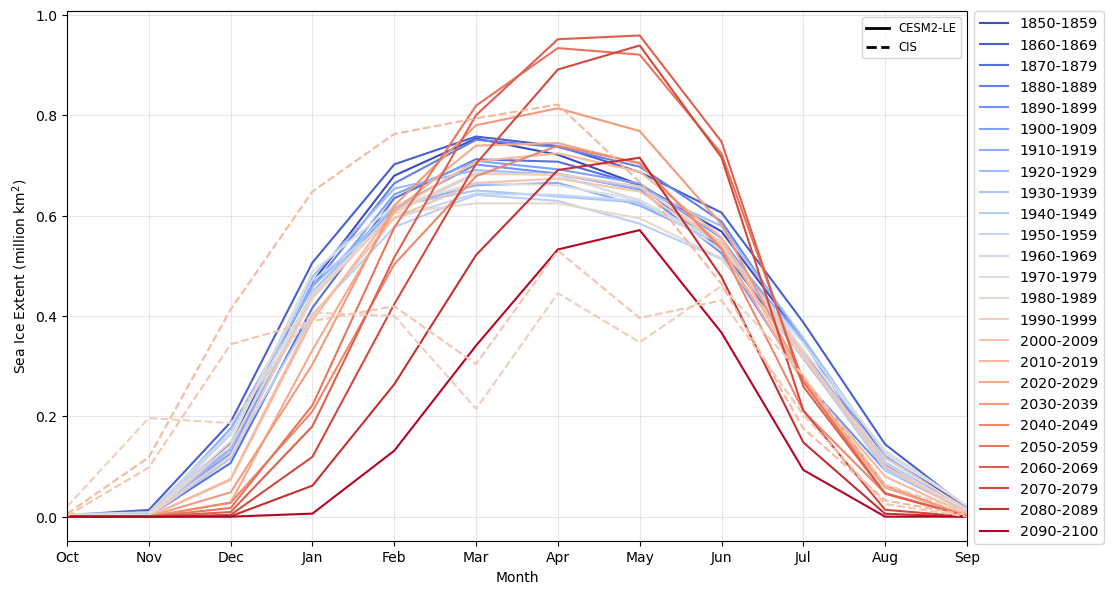

Execution time:  0.0 hours, 0.0 minutes, 39.34145522117615 seconds


In [34]:
# Set xticks to represent months from January to December
start_time = time.time()

fig,ax=plt.subplots(figsize=(10,6.05))
all_data = [model_1850_59_monthly, model_1860_69_monthly, model_1870_79_monthly, model_1880_89_monthly,
            model_1890_99_monthly, model_1900_09_monthly, model_1910_19_monthly, model_1920_29_monthly,
            model_1930_39_monthly, model_1940_49_monthly, model_1950_59_monthly, model_1960_69_monthly, 
            model_1970_79_monthly, model_1980_89_monthly, model_1990_99_monthly, model_2000_09_monthly,
            model_2010_19_monthly, model_2020_29_monthly, model_2030_39_monthly, model_2040_49_monthly,
            model_2050_59_monthly, model_2060_69_monthly, model_2070_79_monthly, model_2080_89_monthly,
            model_2090_100_monthly]

all_data1 =[obs_1990_99_monthly, obs_2000_09_monthly ,obs_2010_19_monthly]

labels = ['1850-1859', '1860-1869', '1870-1879', '1880-1889', '1890-1899', '1900-1909', '1910-1919',
          '1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989',
          '1990-1999', '2000-2009', '2010-2019', '2020-2029', '2030-2039', '2040-2049', '2050-2059',
          '2060-2069', '2070-2079', '2080-2089', '2090-2100']
'''
cmap=['lime', 'darkgreen', 'salmon', 'cyan', 'magenta', 'yellow', 'coral', 'maroon', 
      'purple',  'navy', 'turquoise','beige', 'peachpuff', 'lightblue', 'red', 'green', 'blue',
      'gold', 'indigo', 'pink', 'olive','violet', 'brown', 'orange', 'black',]
'''
cmap = plt.cm.get_cmap('coolwarm', 25)

#cmap2=[cmap[14], cmap[15], cmap[16]]
cmap2=[cmap(14), cmap(15), cmap(16)]


for i in range(len(all_data)):
    linestyle = '-'  # Default linestyle
    ax.plot((np.append(all_data[i][9:],all_data[i][:9])), color=cmap(i), linestyle=linestyle,
            label=labels[i])

for i in range(len(all_data1)):
    linestyle = '--'  # Default linestyle
    ax.plot((np.append(all_data1[i][9:],all_data1[i][:9])), color=cmap2[i], linestyle=linestyle)
    
    
legend1 = ax.legend(loc='best',fontsize=10.3, bbox_to_anchor=(1.0, 1.014))

# Add the legend manually to the current Axes.
ax.add_artist(legend1)
namedatas=['CESM2-LE','CIS']
xdatas = [1, 1]
ydatas = [0.2, 0.15]
color = ['k', 'k']
linestyles = ['-', '--']
linewidths = [2, 2]

for x, y, name, c, ls, lw in zip(xdatas, ydatas, namedatas, color, linestyles, linewidths):
    ax.plot(x, y, color=c, linestyle=ls, linewidth=lw, label=name)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[len(all_data):], labels[len(all_data):], fontsize='small',loc='upper right')

plt.xticks(np.arange(0,12), ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sep'])
plt.xlabel('Month')
plt.ylabel('Sea Ice Extent (million km$^2$)')
#plt.title('Seasonal Cycle of Sea ice Extent', fontweight='bold')
#plt.legend(loc='best',fontsize='small')
plt.grid(alpha=0.3)
plt.xlim(0,11)
plt.tight_layout()
plt.savefig('plot1-new.jpg', dpi=300, bbox_inches='tight')

plt.show()


end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

In [ ]:
# Set xticks to represent months from January to December
start_time = time.time()

fig,ax=plt.subplots(figsize=(10,6.05))
all_data = [ model_1990_99_monthly,model_2000_09_monthly, model_2010_19_monthly ]
all_data1 =[obs_1990_99_monthly, obs_2000_09_monthly ,obs_2010_19_monthly]

labels = ['1990-1999', '2000-2009', '2010-2019']


colors=[cmap[14], cmap[15], cmap[16]]


for i in range(len(all_data)):
    linestyle = '-'  # Default linestyle
    ax.plot((np.append(all_data[i][9:],all_data[i][:9])), color=colors[i], linestyle=linestyle,
            label=labels[i])

for i in range(len(all_data1)):
    linestyle = '--'  # Default linestyle
    ax.plot((np.append(all_data1[i][9:],all_data1[i][:9])), color=colors[i], linestyle=linestyle)
    
    
legend1 = ax.legend(loc='best',fontsize=10.3, bbox_to_anchor=(1.0, 1.0))

# Add the legend manually to the current Axes.
ax.add_artist(legend1)
namedatas=['CESM2-LE','CIS']
xdatas = [1, 1]
ydatas = [0.2, 0.15]
color = ['k', 'k']
linestyles = ['-', '--']
linewidths = [2, 2]

for x, y, name, c, ls, lw in zip(xdatas, ydatas, namedatas, color, linestyles, linewidths):
    ax.plot(x, y, color=c, linestyle=ls, linewidth=lw, label=name)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[len(all_data):], labels[len(all_data):], fontsize='small',loc='upper left')

plt.xticks(np.arange(0,12), ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sep'])
plt.xlabel('Month')
plt.ylabel('Sea Ice Extent (million km$^2$)')
plt.grid(alpha=0.3)
plt.xlim(0,11)
plt.tight_layout()
plt.savefig(path+'/plots/'+'plot1-new1.jpg', dpi=300, bbox_inches='tight')

plt.show()


end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

#### spatial plot

In [36]:
model_CT_sel=model_CT.sel(time=slice('1990','2019'))
obs_CT_sel=obs_CT.resample(time='1M').mean().sel(time=slice('1990','2019'))

In [ ]:
#model_CT_sel=model_CT_sel.where(model_CT_sel>0,0)
#obs_CT_sel=obs_CT_sel.where(obs_CT_sel>0,0)

In [37]:
obs_CT_1990_99 = obs_CT_sel.sel(time=slice('1990', '1999'))
obs_CT_2000_09 = obs_CT_sel.sel(time=slice('2000', '2009'))
obs_CT_2010_19 = obs_CT_sel.sel(time=slice('2010', '2019'))

model_CT_1990_99 = model_CT_sel.sel(time=slice('1990', '1999'))
model_CT_2000_09 = model_CT_sel.sel(time=slice('2000', '2009'))
model_CT_2010_19 = model_CT_sel.sel(time=slice('2010', '2019'))

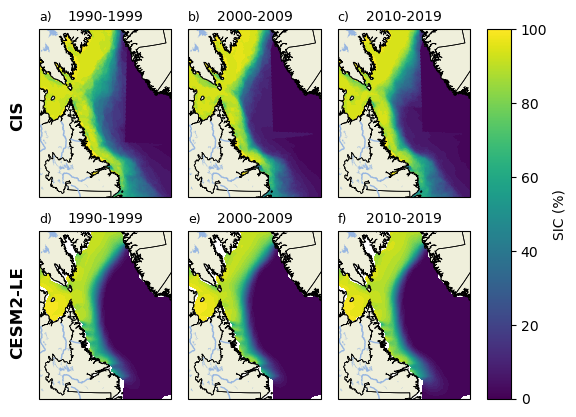

Execution time:  0.0 hours, 1.0 minutes, 2.830461025238037 seconds


In [38]:
start_time = time.time()

# Create a figure with two# Create a figure with two subplots
fig = plt.figure(figsize=(6,4.8))

selected_data=[obs_CT_1990_99,obs_CT_2000_09, obs_CT_2010_19, model_CT_1990_99, model_CT_2000_09,model_CT_2010_19]
titles=['1990-1999', '2000-2009','2010-2019','1990-1999', '2000-2009','2010-2019']
letter=['a)','b)','c)','d)','e)','f)']
norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)


x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
#for i in range(3):
    # Create a subplot with the PlateCarree projection
    ax = plt.subplot(2,3, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,letter[i], transform=ax.transAxes, fontsize=9)
    
   
    if i in [0,1,2]:
        contf=ax.contourf(selected_data[i].lon, selected_data[i].lat, selected_data[i][3::12].fillna(0).mean('time')*100,
                          levels=45, norm=norm, transform=ccrs.PlateCarree())
    if i in [3,4,5]:
        contf=ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][3::12].mean('time')*100,
                          levels=45, norm=norm, transform=ccrs.PlateCarree())
    
cbar_ax = fig.add_axes([0.9, 0.11, 0.04, 0.77])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC (%)')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC (%)', fontsize=10)  

name=['CIS', 'CESM2-LE']
x=[0.13,0.13]
y=[0.7,0.29]
for i in range (2):
    fig.text(x[i],y[i], name[i], fontweight='bold',va='bottom', ha='center', rotation='vertical',
             rotation_mode='anchor',fontsize=12)
plt.subplots_adjust(wspace=-0.1)
#plt.subplots_adjust(hspace=0.7)
#plt.savefig(path+'/plots/'+'plot11-new.jpg',dpi=300, bbox_inches='tight')
plt.show()



end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

In [39]:
obs_months=obs_CT_sel.groupby('time.month').mean('time')
model_months=model_CT_sel.groupby('time.month').mean('time')

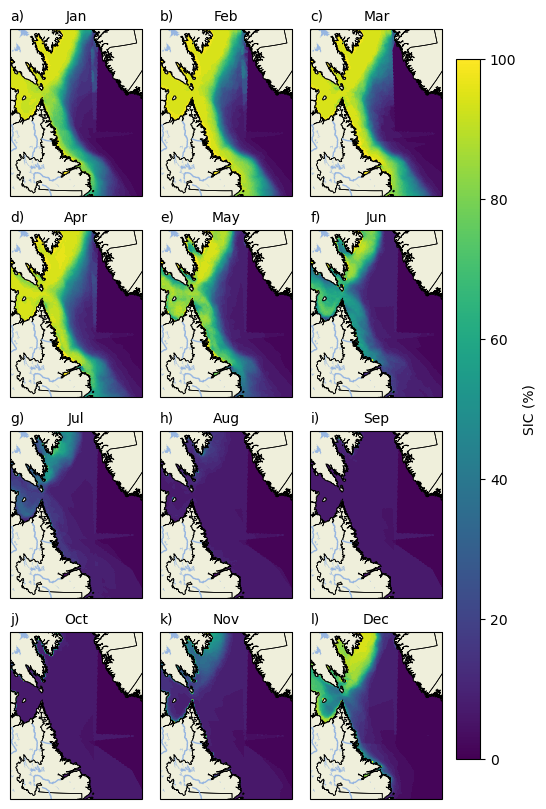

Execution time:  0.0 hours, 2.0 minutes, 16.534990072250366 seconds


In [40]:
start_time = time.time()
#fig = plt.figure(figsize=(8, 4.8))
fig = plt.figure(figsize=(8,10))
selected_data=[obs_months[0],obs_months[1],obs_months[2],obs_months[3],obs_months[4],obs_months[5],
              obs_months[6],obs_months[7],obs_months[8],obs_months[9],obs_months[10],obs_months[11]]
titles = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
name=['a)','b)','c)','d)','e)','f)','g)','h)','i)','j)','k)','l)']

norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
    ax = plt.subplot(4,3, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    #ax.add_feature(cfeature.BORDERS,  zorder=2)
    
    
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=10)
    
    
    ax.contourf(selected_data[i].lon, selected_data[i].lat, selected_data[i].fillna(0)*100, levels=45, norm=norm,
                   transform=ccrs.PlateCarree(), )
    #ax.contour(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i]*100, levels=[15], colors='red',
                   #transform=ccrs.PlateCarree(), )
    '''
    gl = ax.gridlines(draw_labels=True, linewidth=2, color='black', alpha=0.1, linestyle='--',
                          transform=ccrs.PlateCarree())
    gl.xlabels_bottom, gl.ylabels_left = False, False
    gl.xlabels_top, gl.ylabels_right = False, False
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    '''
cbar_ax = fig.add_axes([0.8, 0.15, 0.03, 0.7])
#cbar_ax = fig.add_axes([0.89, 0.125, 0.03, 0.75])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC (%)')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC (%)', fontsize=10)  

plt.subplots_adjust(wspace=-0.53)
plt.savefig(path+'/plots/'+'plot4-obs.jpg',dpi=300, bbox_inches='tight')
plt.show()



end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

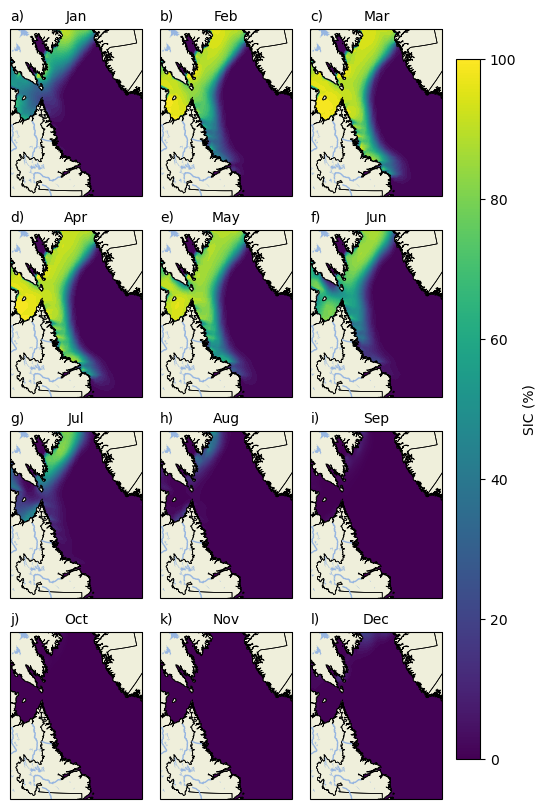

Execution time:  0.0 hours, 0.0 minutes, 29.135796070098877 seconds


In [41]:
start_time = time.time()
#fig = plt.figure(figsize=(8, 4.8))
fig = plt.figure(figsize=(8,10))
selected_data=[model_months[0],model_months[1],model_months[2],model_months[3],model_months[4],
               model_months[5],model_months[6],model_months[7],model_months[8],model_months[9],
               model_months[10],model_months[11]]
titles = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
name=['a)','b)','c)','d)','e)','f)','g)','h)','i)','j)','k)','l)']

norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
    ax = plt.subplot(4,3, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    #ax.add_feature(cfeature.BORDERS,  zorder=2)
    
    
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=10)
    
    
    ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i].fillna(0)*100,levels=45,
                norm=norm,transform=ccrs.PlateCarree(), )
    #ax.contour(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i]*100, levels=[15], colors='red',
                   #transform=ccrs.PlateCarree(), )
    '''
    gl = ax.gridlines(draw_labels=True, linewidth=2, color='black', alpha=0.1, linestyle='--',
                          transform=ccrs.PlateCarree())
    gl.xlabels_bottom, gl.ylabels_left = False, False
    gl.xlabels_top, gl.ylabels_right = False, False
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    '''
cbar_ax = fig.add_axes([0.8, 0.15, 0.03, 0.7])
#cbar_ax = fig.add_axes([0.89, 0.125, 0.03, 0.75])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC (%)')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC (%)', fontsize=10)  

plt.subplots_adjust(wspace=-0.53)
#plt.savefig(path+'/plots/'+'plot4-model.jpg',dpi=300, bbox_inches='tight')
plt.show()



end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

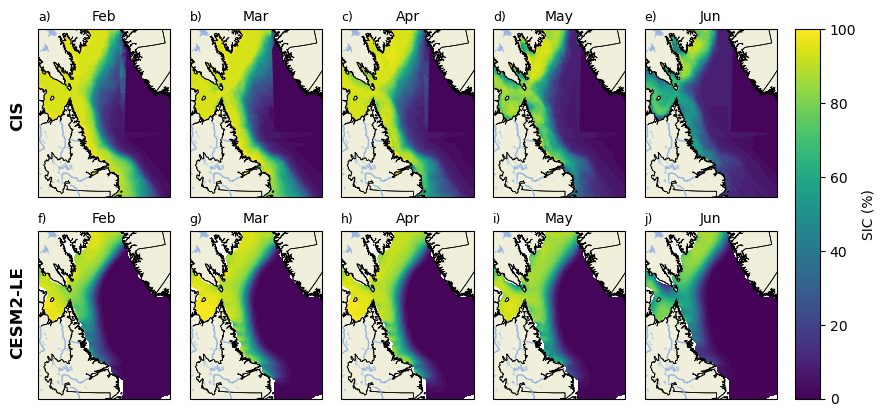

Execution time:  0.0 hours, 1.0 minutes, 17.115771770477295 seconds


In [52]:
start_time = time.time()
#fig = plt.figure(figsize=(8, 4.8))
fig = plt.figure(figsize=(10,4.8))
selected_data=[obs_months[1],obs_months[2],obs_months[3],obs_months[4],obs_months[5],
          model_months[1],model_months[2],model_months[3],model_months[4],model_months[5]]

titles = ['Feb','Mar','Apr','May','Jun','Feb','Mar','Apr','May','Jun']
letter=['a)','b)','c)','d)','e)','f)','g)','h)','i)','j)']



norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)


x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
#for i in range(3):
    # Create a subplot with the PlateCarree projection
    ax = plt.subplot(2,5, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,letter[i], transform=ax.transAxes, fontsize=9)
    
   
    if i in [0,1,2,3,4]:
        contf=ax.contourf(selected_data[i].lon, selected_data[i].lat, selected_data[i].fillna(0)*100,
                          levels=45, norm=norm, transform=ccrs.PlateCarree())
    if i in [5,6,7,8,9]:
        contf=ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i]*100,
                          levels=45, norm=norm, transform=ccrs.PlateCarree())
    
cbar_ax = fig.add_axes([0.9, 0.11, 0.025, 0.77])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC (%)')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC (%)', fontsize=10)  

name=['CIS', 'CESM2-LE']
x=[0.13,0.13]
y=[0.7,0.29]
for i in range (2):
    fig.text(x[i],y[i], name[i], fontweight='bold',va='bottom', ha='center', rotation='vertical',
             rotation_mode='anchor',fontsize=12)
plt.subplots_adjust(wspace=-0.1)
#plt.subplots_adjust(hspace=0.7)
plt.savefig('plot11-new.jpg',dpi=300, bbox_inches='tight')
plt.show()



end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

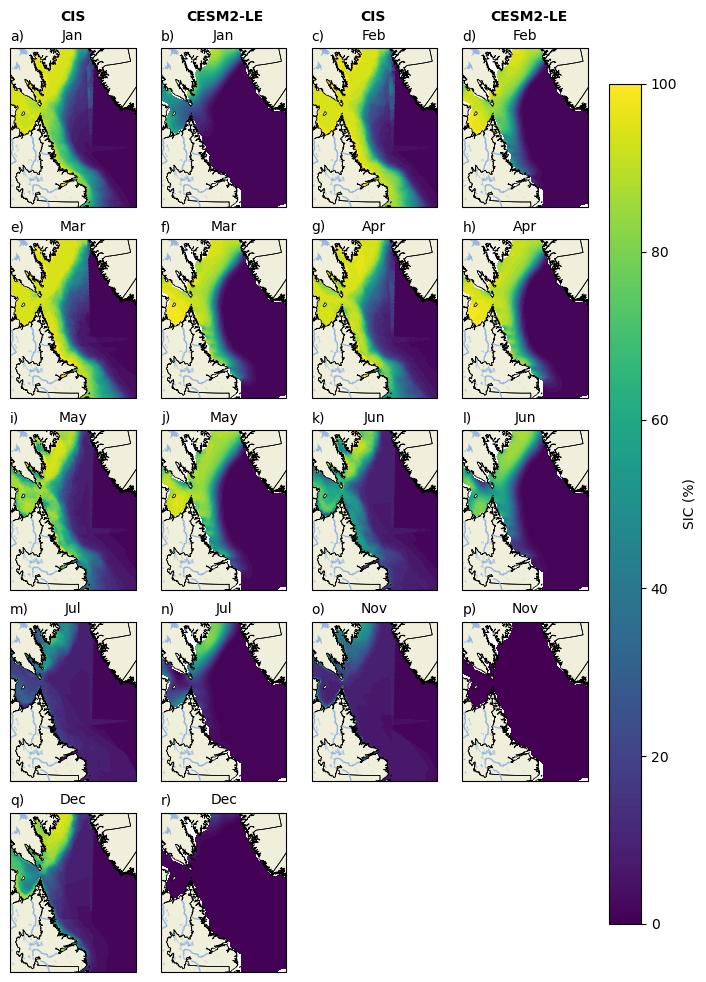

Execution time:  0.0 hours, 2.0 minutes, 29.352487087249756 seconds


In [43]:
start_time = time.time()
#fig = plt.figure(figsize=(8, 4.8))
fig = plt.figure(figsize=(8,12))
obs_data=[obs_months[0],obs_months[1],obs_months[2],obs_months[3],obs_months[4],
          obs_months[5],obs_months[6],obs_months[10],obs_months[11]]

model_data=[model_months[0],model_months[1],model_months[2],model_months[3],model_months[4],
            model_months[5],model_months[6],model_months[10],model_months[11]]

titles = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Nov','Dec']
name=['a)','c)','e)','g)','i)','k)','m)','o)','q)']
name1=['b)','d)','f)','h)','j)','l)','n)','p)','r)']

norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i in range(18):
    index = i // 2 
    
    if i % 2 == 0:
        ax = plt.subplot(5, 4, i+1, projection=ccrs.AlbersEqualArea(central_longitude=c_lon,
                                                                     central_latitude=c_lat,
                                                                     standard_parallels=(y0, y1)))
        ax.set_title(titles[index], fontsize=10)
        ax.add_feature(cfeature.LAND, zorder=2)
        ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5, zorder=2)
        ax.add_feature(cfeature.LAKES.with_scale('10m'), zorder=2)
        ax.add_feature(cfeature.RIVERS.with_scale('10m'), zorder=2)
        ax.set_extent([x0, x1, y0, y1])
        ax.contourf(obs_data[index].lon, obs_data[index].lat, obs_data[index].fillna(0)*100, levels=45,
                    norm=norm, transform=ccrs.PlateCarree())
        ax.text(0,1.05,name[index], transform=ax.transAxes, fontsize=10)
        
    else:
        ax = plt.subplot(5, 4, i+1, projection=ccrs.AlbersEqualArea(central_longitude=c_lon,
                                                                     central_latitude=c_lat,
                                                                     standard_parallels=(y0, y1)))
        if index < len(model_data):
            ax.set_title(titles[index], fontsize=10)
            ax.add_feature(cfeature.LAND, zorder=2)
            ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5, zorder=2)
            ax.add_feature(cfeature.LAKES.with_scale('10m'), zorder=2)
            ax.add_feature(cfeature.RIVERS.with_scale('10m'), zorder=2)
            ax.set_extent([x0, x1, y0, y1])
            ax.contourf(model_data[index].TLON, model_data[index].TLAT, model_data[index]*100, levels=45,
                        norm=norm, transform=ccrs.PlateCarree())
            ax.text(0,1.05,name1[index], transform=ax.transAxes, fontsize=10)

cbar_ax = fig.add_axes([0.9, 0.15, 0.04, 0.7])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC (%)')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC (%)', fontsize=10)

name=['CIS', 'CESM2-LE','CIS', 'CESM2-LE']
x=[0.23, 0.42, 0.605, 0.8]
y=[0.9,0.9,0.9,0.9]
for i in range (4):
    fig.text(x[i],y[i], name[i], fontweight='bold',va='bottom', ha='center', rotation='horizontal',
             rotation_mode='anchor',fontsize=10)


plt.subplots_adjust(wspace=-0.1)
#plt.savefig(path+'/plots/'+'plot4-obs_mod1.jpg',dpi=300, bbox_inches='tight')
plt.show()



end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

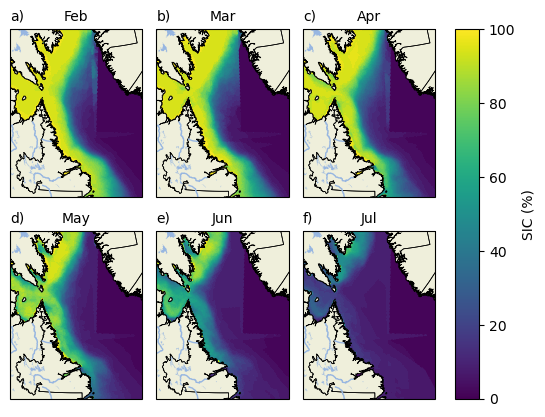

Execution time:  0.0 hours, 1.0 minutes, 17.592571020126343 seconds


In [44]:
start_time = time.time()
fig = plt.figure(figsize=(6, 4.8))

selected_data=[obs_months[1],obs_months[2],obs_months[3],obs_months[4],obs_months[5],obs_months[6]]
titles = ['Feb','Mar','Apr','May','Jun','Jul','Aug']
name=['a)','b)','c)','d)','e)','f)','g)','h)', ]

norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
    ax = plt.subplot(2,3, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    #ax.add_feature(cfeature.BORDERS,  zorder=2)
    
    
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=10)
    
    
    ax.contourf(selected_data[i].lon, selected_data[i].lat, selected_data[i].fillna(0)*100, levels=45, norm=norm,
                   transform=ccrs.PlateCarree(), )
    
    
cbar_ax = fig.add_axes([0.9, 0.11, 0.04, 0.77])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC (%)')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC (%)', fontsize=10)  

plt.subplots_adjust(wspace=-0.15)
#plt.savefig(path+'/plots/'+'plot4-obs1.jpg',dpi=300, bbox_inches='tight')
plt.show()



end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

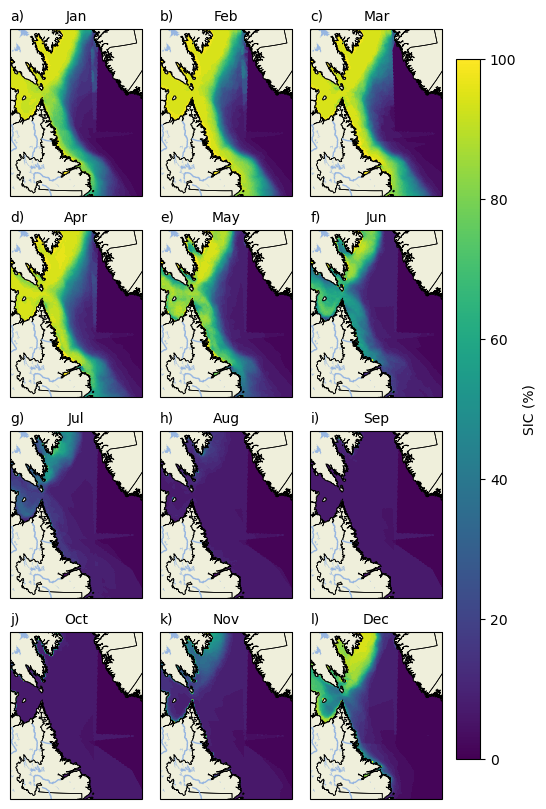

Execution time:  0.0 hours, 2.0 minutes, 6.768778085708618 seconds


In [45]:
start_time = time.time()
#fig = plt.figure(figsize=(8, 4.8))
fig = plt.figure(figsize=(8,10))
selected_data=[obs_months[0],obs_months[1],obs_months[2],obs_months[3],obs_months[4],obs_months[5],
              obs_months[6],obs_months[7],obs_months[8],obs_months[9],obs_months[10],obs_months[11]]
titles = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
name=['a)','b)','c)','d)','e)','f)','g)','h)','i)','j)','k)','l)']

norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
    ax = plt.subplot(4,3, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    #ax.add_feature(cfeature.BORDERS,  zorder=2)
    
    
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=10)
    
    
    ax.contourf(selected_data[i].lon, selected_data[i].lat, selected_data[i].fillna(0)*100, levels=45, norm=norm,
                   transform=ccrs.PlateCarree(), )
    #ax.contour(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i]*100, levels=[15], colors='red',
                   #transform=ccrs.PlateCarree(), )
    '''
    gl = ax.gridlines(draw_labels=True, linewidth=2, color='black', alpha=0.1, linestyle='--',
                          transform=ccrs.PlateCarree())
    gl.xlabels_bottom, gl.ylabels_left = False, False
    gl.xlabels_top, gl.ylabels_right = False, False
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    '''
cbar_ax = fig.add_axes([0.8, 0.15, 0.03, 0.7])
#cbar_ax = fig.add_axes([0.89, 0.125, 0.03, 0.75])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC (%)')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC (%)', fontsize=10)  

plt.subplots_adjust(wspace=-0.53)
#plt.savefig(path+'/plots/'+'plot4-obs.jpg',dpi=300, bbox_inches='tight')
plt.show()



end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")